In [157]:
from sentence_segmenter import scores_computation, sentence_segment_starting_ind, create_list_of_sentence_boundaries
from data_loader import train_data_loader

In [1]:
import spacy
from spacy.language import Language
import json

# Tests adding custom components

In [8]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')
doc = nlp('"Management is doing things right; leadership is doing the right things." -Peter Drucker')
for sent in doc.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))
@Language.component('test_rule')
def set_custom_Sentence_end_points(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc
nlp.add_pipe('test_rule', before='parser')
doc=nlp('"Management is doing things right; leadership is doing the right things." -Peter Drucker')
print("---segmentation with new rule")
for sent in doc.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
"Management is doing things right; leadership is doing the right things."
73
***
-Peter Drucker
14
---segmentation with new rule
***
"Management is doing things right;
34
***
leadership is doing the right things."
38
***
-Peter Drucker
14


# Data Loading

In [10]:
corpus_fpath = 'labeled/ldsi_w21_curated_annotations_v2.json'
data = json.load(open(corpus_fpath))
data_train = train_data_loader(data)
generated_split= sentence_segment_starting_ind(data_train, "standard")
true_split = create_list_of_sentence_boundaries(data_train)

---All sentences segmented in documents


# Analysis of documents with low precision score
precision = 0.015748031496062992 for 61aea55f97ad59b4cfc41323

precision = 0.017391304347826087 for 61aea57497ad59b4cfc413ba

In [142]:
doc_1_id = '61aea55f97ad59b4cfc41323'
doc_2_id = '61aea57497ad59b4cfc413ba'
for document in data_train['documents']:
    if document['_id'] == doc_1_id:
        low_precision_1 = document['plainText']
        #print(document)
    elif document['_id'] == doc_2_id:
        low_precision_2 = document['plainText']
        print(document)
true_boundaries_ind_1 = true_split[doc_1_id]
true_boundaries_ind_2 = true_split[doc_2_id]

{'_id': '61aea57497ad59b4cfc413ba', 'name': '1036712.txt', 'plainText': 'Citation Nr: 1036712\t\r\nDecision Date: 09/28/10    Archive Date: 10/05/10\r\n\r\nDOCKET NO.  06-34 236\t)\tDATE\r\n\t)\r\n\t)\r\n\r\nOn appeal from the\r\nDepartment of Veterans Affairs Regional Office in Houston, Texas\r\n\r\n\r\nTHE ISSUE\r\n\r\nEntitlement to service connection for a right knee disorder.  \r\n\r\n\r\nREPRESENTATION\r\n\r\nAppellant represented by:\tDisabled American Veterans\r\n\r\n\r\nWITNESS AT HEARING ON APPEAL\r\n\r\nThe Veteran\r\n\r\n\r\nATTORNEY FOR THE BOARD\r\n\r\nTerrence T. Griffin\r\n\r\n\r\nINTRODUCTION\r\n\r\nThe Veteran served on active duty from November 1972 to July \r\n1975.\r\n\r\nThis matter came before the Board of Veterans\' Appeals (Board) on \r\nappeal from a decision of July 2005 by the Department of Veteran \r\nAffairs (VA) Houston, Texas Regional Office (RO).\r\n\r\nThe Board remanded the present claim under review for further \r\ndevelopment in July 2009.\r\n\r\nIn

In [146]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')
doc_1 = nlp(low_precision_1)
doc_2 = nlp(low_precision_2)

In [38]:
for sent in doc_1.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
Citation Nr: 0942646	
Decision Date: 11/09/09    Archive Date: 11/17/09


76
***
DOCKET
6
***
NO.
3
***
 03-00 030	)	DATE
	)
	)


29
***
On appeal from the
Department of Veterans Affairs Regional Office in 
Philadelphia, Pennsylvania



104
***
THE ISSUE


13
***
Entitlement to service connection for a left ankle 
disability.
64
***




6
***
REPRESENTATION


18
***
Appellant represented by:	The American Legion



51
***
WITNESS
7
***
AT HEARING ON APPEAL


24
***
Appellant



15
***
ATTORNEY FOR THE BOARD


26
***
T. Azizi-Barcelo, Counsel



31
***
INTRODUCTION
12
***

 
The Veteran served on active duty from September 1979 to 
October 1983.
77
***



4
***
This case is before the Board of Veterans' Appeals (Board) on 
appeal from a February 2002 rating decision of the Department 
of Veterans Affairs (VA) Regional Office (RO) in 
Philadelphia, Pennsylvania, that denied an application to 
reopen a claim for service connection for a left ankle 
disability.
307
***
 In September 200

In [37]:
for sent in doc_2.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
Citation Nr: 1036712	
Decision Date: 09/28/10    Archive Date:
63
***
10/05/10


12
***
DOCKET
6
***
NO.
3
***
 06-34 236	)	DATE
	)
	)


29
***
On appeal from the
Department of Veterans Affairs Regional Office in Houston, Texas



90
***
THE ISSUE


13
***
Entitlement to service connection for a right knee disorder.
60
***
 


REPRESENTATION


25
***
Appellant
9
***
represented by:
15
***
	Disabled American Veterans



33
***
WITNESS
7
***
AT HEARING ON APPEAL


24
***
The Veteran



17
***
ATTORNEY FOR THE BOARD


26
***
Terrence T. Griffin



25
***
INTRODUCTION


16
***
The Veteran served on active duty from November 1972 to July 
1975.
68
***



4
***
This matter came before the Board of Veterans' Appeals (Board) on 
appeal from a decision of July 2005 by the Department of Veteran 
Affairs (VA) Houston, Texas Regional Office (RO).
184
***



4
***
The Board remanded the present claim under review for further 
development in July 2009.
89
***



4
***
In May 2010 and July 2010 d

In [144]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')

@Language.component('spatial_separators')
def set_custom_Sentence_end_points_spatial(doc):
    for token in doc[:-1]:
        if " \r\n\r" in token.text:
            doc[token.i].is_sent_start = True
        elif "\r\n\r" in token.text:
            doc[token.i+1].is_sent_start = True
        elif "\t" in token.text:
            doc[token.i+1].is_sent_start = False
    return doc

@Language.component('footnote')
def set_custom_Sentence_end_points_footnote(doc):
    for token in doc[:-1]:
        if "_" in token.text:
            doc[token.i+1].is_sent_start = False
    return doc

nlp.add_pipe('spatial_separators', before='parser')
nlp.add_pipe('footnote', before='parser')
print(nlp.pipe_names)
doc_1 = nlp(low_precision_1)
doc_2 = nlp(low_precision_2)

['tok2vec', 'tagger', 'spatial_separators', 'footnote', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'sentencizer']


In [71]:
for sent in doc_2.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
Citation Nr: 1036712	
Decision Date: 09/28/10    Archive Date:
63
***
10/05/10


12
***
DOCKET
6
***
NO.
3
***
 06-34 236	)	DATE
	)
	)


29
***
On appeal from the
Department of Veterans Affairs Regional Office in Houston, Texas



90
***
THE ISSUE


13
***
Entitlement to service connection for a right knee disorder.
60
***
 


REPRESENTATION


25
***
Appellant
9
***
represented by:
15
***
	Disabled American Veterans



33
***
WITNESS
7
***
AT HEARING ON APPEAL


24
***
The Veteran



17
***
ATTORNEY FOR THE BOARD


26
***
Terrence T. Griffin



25
***
INTRODUCTION


16
***
The Veteran served on active duty from November 1972 to July 
1975.
68
***



4
***
This matter came before the Board of Veterans' Appeals (Board) on 
appeal from a decision of July 2005 by the Department of Veteran 
Affairs (VA) Houston, Texas Regional Office (RO).
184
***



4
***
The Board remanded the present claim under review for further 
development in July 2009.
89
***



4
***
In May 2010 and July 2010 d

In [147]:
cpt_string = 0
pred_boundaries_ind_1 = []
for sentence in doc_1.sents:
    pred_boundaries_ind_1.append(cpt_string)
    cpt_string +=len(sentence.text)
pred_boundaries_ind_2 = []
cpt_string = 0
for sentence in doc_2.sents:
    pred_boundaries_ind_2.append(cpt_string)
    cpt_string +=len(sentence.text)
print(scores_computation(true_boundaries_ind_1, pred_boundaries_ind_1))
print(scores_computation(true_boundaries_ind_2, pred_boundaries_ind_2))

(0.015748031496062992, 0.015037593984962405, 0.015384615384615384)
(0.017391304347826087, 0.017241379310344827, 0.017316017316017313)


# Analysis of documents with low recall scores
0.014925373134328358 from 61aea55d97ad59b4cfc412cb

0.015037593984962405 from 61aea55f97ad59b4cfc41323: already adressed in the previous section as this is also the document with the lowest precision

In [149]:
doc_id = '61aea55d97ad59b4cfc412cb'
for document in data_train['documents']:
    if document['_id'] == doc_id:
        low_precision = document['plainText']
        #print(document)
        break
true_boundaries_ind = true_split[doc_id]

In [139]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')
doc = nlp(low_precision)

In [84]:
for sent in doc.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
Citation Nr: 1036712	
Decision Date: 09/28/10    Archive Date: 10/05/10

DOCKET NO.
86
***
 06-34 236	)	DATE
	)
	)


29
***
On appeal from the
Department of Veterans Affairs Regional Office in Houston, Texas


THE ISSUE

Entitlement to service connection for a right knee disorder.
163
***
 


REPRESENTATION

Appellant represented by:	Disabled American Veterans


WITNESS AT HEARING ON APPEAL

The Veteran


ATTORNEY FOR THE BOARD

Terrence T. Griffin


INTRODUCTION

The Veteran served on active duty from November 1972 to July 
1975.
267
***


This matter came before the Board of Veterans' Appeals (Board) on 
appeal from a decision of July 2005 by the Department of Veteran 
Affairs (VA) Houston, Texas Regional Office (RO).
188
***


The Board remanded the present claim under review for further 
development in July 2009.
93
***


In May 2010 and July 2010 documents, the Veteran raised 
claims regarding (i) a skin disorder, to include as 
secondary to herbicide exposure, (ii) sleep apne

In [140]:
nlp.add_pipe('spatial_separators', before='parser')
nlp.add_pipe('footnote', before='parser')
doc = nlp(low_precision)

In [110]:
for sent in doc.sents:
        print('***')
        print(sent.text)
        print(len(sent.text))

***
Citation Nr: 1036712	
Decision Date: 09/28/10    Archive Date:
63
***
10/05/10


12
***
DOCKET
6
***
NO.
3
***
 06-34 236	)	DATE
	)
	)


29
***
On appeal from the
Department of Veterans Affairs Regional Office in Houston, Texas



90
***
THE ISSUE


13
***
Entitlement to service connection for a right knee disorder.
60
***
 


REPRESENTATION


25
***
Appellant
9
***
represented by:
15
***
	Disabled American Veterans



33
***
WITNESS
7
***
AT HEARING ON APPEAL


24
***
The Veteran



17
***
ATTORNEY FOR THE BOARD


26
***
Terrence T. Griffin



25
***
INTRODUCTION


16
***
The Veteran served on active duty from November 1972 to July 
1975.
68
***



4
***
This matter came before the Board of Veterans' Appeals (Board) on 
appeal from a decision of July 2005 by the Department of Veteran 
Affairs (VA) Houston, Texas Regional Office (RO).
184
***



4
***
The Board remanded the present claim under review for further 
development in July 2009.
89
***



4
***
In May 2010 and July 2010 d

In [141]:
cpt_string = 0
pred_boundaries_ind = []
for sentence in doc.sents:
    pred_boundaries_ind.append(cpt_string)
    cpt_string +=len(sentence.text)
print(scores_computation(true_boundaries_ind, pred_boundaries_ind))

(0.15217391304347827, 0.208955223880597, 0.17610062893081763)


# Tests for better handling of \r\n\r 

In [ ]:
text_test = "Archive Date: 10/05/10\r\n\r\nDOCKET NO.  06-34 236\t)\tDATE\r\n\t)\r\n\t)\r\n\r\nOn appeal from the\r\nDepartment of Veterans Affairs Regional Office in Houston, Texas\r\n\r\n\r\nTHE ISSUE\r\n\r\nEntitlement to service connection for a right knee disorder.  \r\n\r\n\r\nREPRESENTATION\r\n\r\nAppellant represented by:\tDisabled American Veterans\r\n\r\n\r\nWITNESS AT HEARING ON APPEAL\r\n\r\nThe Veteran\r\n\r\n\r\nATTORNEY FOR THE BOARD\r\n\r\nTerrence T. Griffin\r\n\r\n\r\nINTRODUCTION\r\n\r\nThe Veteran served on active duty from November 1972 to July "
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')
@Language.component('separation')
def set_custom_Sentence_end_points_footnote(doc):
    for token in doc[:-1]:
        if "_" in token.text:
            doc[token.i+1].is_sent_start = False
    return doc

#nlp.add_pipe('separation', before='parser')
doc = nlp(text_test)
#"\w+[\\r]+[\\n]+[\\r]\w+"

for sent in doc.sents:
        print('***')
        print(sent.text)

In [122]:
from spacy.symbols import ORTH
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('sentencizer')
matcher = Matcher(nlp.vocab)
matcher.add("\w+"+"Dat"+"\w+", [[{"LOWER": "\w+"+"dat"+"\w+"}]])

def replace_word(orig_text, replacement):
    tok = nlp(orig_text)
    text = ''
    buffer_start = 0
    for _, match_start, _ in matcher(tok):
        if match_start > buffer_start:  # If we've skipped over some tokens, let's add those in (with trailing whitespace if available)
            text += tok[buffer_start: match_start].text + tok[match_start - 1].whitespace_
        text += replacement + tok[match_start].whitespace_  # Replace token, with trailing whitespace if available
        buffer_start = match_start + 1
    text += tok[buffer_start:].text
    return text

text_test = "Archive Date: 10/05/10\r\n\r\nDOCKET NO.  06-34 236\t)\tDATE\r\n\t)\r\n\t)\r\n\r\nOn appeal from the\r\nDepartment of Veterans Affairs Regional Office in Houston, Texas\r\n\r\n\r\nTHE ISSUE\r\n\r\nEntitlement to service connection for a right knee disorder.  \r\n\r\n\r\nREPRESENTATION\r\n\r\nAppellant represented by:\tDisabled American Veterans\r\n\r\n\r\nWITNESS AT HEARING ON APPEAL\r\n\r\nThe Veteran\r\n\r\n\r\nATTORNEY FOR THE BOARD\r\n\r\nTerrence T. Griffin\r\n\r\n\r\nINTRODUCTION\r\n\r\nThe Veteran served on active duty from November 1972 to July "
text_test = replace_word(text_test, "BLAVLABLA")
doc = nlp(text_test)
#"\w+[\\r]+[\\n]+[\\r]\w+"
for token in doc:
    if token.text == "Date":
        token = "BLABALBLa"
for sent in doc.sents:
        print('***')
        print(sent.text)

***
Archive Date: 10/05/10

DOCKET NO.
***
 06-34 236	)	DATE
	)
	)


***
On appeal from the
Department of Veterans Affairs Regional Office in Houston, Texas


THE ISSUE

Entitlement to service connection for a right knee disorder.
***
 


REPRESENTATION

Appellant represented by:	Disabled American Veterans


WITNESS AT HEARING ON APPEAL

The Veteran


ATTORNEY FOR THE BOARD

Terrence T. Griffin


INTRODUCTION

The Veteran served on active duty from November 1972 to July


# Tests on Luima segmenter

In [9]:
import luima_sbd.sbd_utils as luima
text = "Citation Nr: 1136601\t\r\nDecision Date: 09/28/11    Archive Date: 10/11/11\r\n\r\nDOCKET NO.  09-30 332\t)\tDATE\r\n\t)\r\n\t)\r\n\r\nOn appeal from the\r\nDepartment of Veterans Affairs Regional Office in New York, New York\r\n\r\n\r\nTHE ISSUE\r\n\r\nEntitlement to service connection for bilateral pes planus.\r\n\r\n\r\nREPRESENTATION\r\n\r\nAppellant represented by:\tNew York State Division of Veterans\' Affairs\r\n\r\n\r\nWITNESS AT HEARING ON APPEAL\r\n\r\nAppellant\r\n\r\n\r\nATTORNEY FOR THE BOARD\r\n\r\nM. G. Mazzucchelli, Counsel\r\n\r\n\r\nINTRODUCTION\r\n\r\nThe Veteran served on active duty from August 1950 to June 1954.  \r\n\r\nThis matter comes before the Board of Veterans\' Appeals (Board) on appeal from a December 2007 rating decision of the Department of Veterans Affairs (VA) Regional Office (RO) in St. Petersburg, Florida.  The case is currently under the jurisdiction of the New York, New York RO.  The Veteran provided testimony before the undersigned at a hearing in New York, New York in April 2011; a transcript of that hearing is of record.  In July 2011, the Board remanded the case for additional development.  The Board is satisfied that there has been substantial compliance with the remand directives and the Board may proceed with review. Stegall v. West, 11 Vet. App. 268 (1998).\r\n\r\nAs noted on the Board\'s remand, the rating decision on appeal characterized the issue as whether new and material evidence had been received to reopen a previously denied claim of service connection for pes planus.  However, review of the record shows that the Veteran was not provided with written notice of the April 1961 denial of his claim for service connection for pes planus, and thus that denial did not become final.  38 U.S.C.A. � 7105. "
list = luima.text2sentences(text, offsets=False)
#start_index = []
#for elem in list:
#    start_index.append(elem[0])
list

['Citation Nr: 1136601',
 'Decision Date: 09/28/11',
 'Archive Date: 10/11/11',
 'DOCKET NO.  09-30 332',
 'DATE',
 'On appeal from the\r\nDepartment of Veterans Affairs Regional Office in New York, New York',
 'THE ISSUE',
 'Entitlement to service connection for bilateral pes planus.',
 'REPRESENTATION',
 "Appellant represented by:\tNew York State Division of Veterans' Affairs",
 'WITNESS AT HEARING ON APPEAL',
 'Appellant',
 'ATTORNEY FOR THE BOARD',
 'M. G. Mazzucchelli, Counsel',
 'INTRODUCTION',
 'The Veteran served on active duty from August 1950 to June 1954.',
 "This matter comes before the Board of Veterans' Appeals (Board) on appeal from a December 2007 rating decision of the Department of Veterans Affairs (VA) Regional Office (RO) in St. Petersburg, Florida.",
 'The case is currently under the jurisdiction of the New York, New York RO.',
 'The Veteran provided testimony before the undersigned at a hearing in New York, New York in April 2011; a transcript of that hearing is o

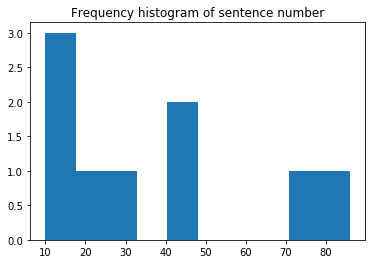

In [19]:
import matplotlib.pyplot as plt
list_of_sent_nb = [10,12,45,86,24,75,26,14,45]
plt.hist(list_of_sent_nb)
plt.title('Frequency histogram of sentence number')
plt.show()